In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wm = np.random.rand(2, 1)

In [3]:
def Perzeptron(x, w):
    out= x.T @ w
    return out

In [4]:
#
#Jetzt haben wir schon mal den forwardpass für ein Perzeptron
#

In [5]:
#wir verwenden den mittleren quadratischen fehler als Loss

In [6]:
def calc_loss(x,y):
    return .5*(y-x)**2
#damit haben wir dann schon mal den Loss

In [7]:
 #wir benutzen nach newton das gradientenverfahren um das lokale minimum zu erreichen
        #wir haben als funktion:
        #y = w * x
        #der fehler ist L = 1/2(Y-y)^2
        #also ist L = (Y-(w * x))^2
        #wir müssen also partiell nach w ableiten
        #fangen wir mal an:
        #wir wollen dL/dw = dL/dy * dy/dw: alsoooo:
        #dL/dy = 1/2(Y^2 - 2Yy +y^2)'
        #      = 1/2(0 - 2Y +2y)
        #      = y-Y
        #dy/dw = x
        #damit ist dL/dw = x*(y-Y)
def backward(x, y, Y):
    return x * (y- Y)

#backward ist auch erledigt!

In [8]:
#und jetzt müssen wir noch die parameter updaten- dafür wollen wir nicht zum MAXIMUM sondern zum MINIMUM
#das erreichen wir indem wir den gradienten von unseren gewichten abziehen
def step(wm, grd, lr):
    return wm - lr*grd

In [9]:
x = np.array([[[1], [1]],[[1], [0]],[[0], [1]], [[0],[0]]])#Dummy data
y = np.array([[1], [0], [0], [0]])#dummy target

In [10]:
losses = []
ls = 0
for epoch in range(10):#wie viele Epochen rechnen wir?
    for i in range(len(x)):#wir iterieren über alle elemente in der dummy data
        n = Perzeptron(x[i], wm)
        loss = .5*(y[i]-n)**2#was ist unser loss? (hier erstmal irrelevant- wird in späteren projekten wichtig
        grd = backward(x[i], n, y[i])#backward
        wm = step(wm, grd, .1)#update der parameter
        ls += loss# wir rechnen erstmal den ganzen loss zusammen
    losses.append(ls.squeeze()/len(x))#dann gucken wir wie groß der mittlere fehler auf den daten ist und merken uns das
    ls = 0# dann mal den laufparameter auf null setzen

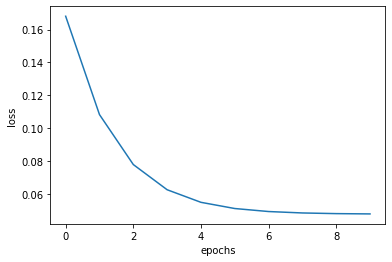

In [11]:
plt.plot(np.arange(len(losses)), losses)#wir plotten alle losses
plt.xlabel("epochs")#xlabel
plt.ylabel("loss")#ylabel
plt.show()#anzeigen